# Interpolación y ajuste

_Procuramos ahora emplear SciPy a fin de **interpolar** y **ajustar** una serie de puntos. Este cuaderno está basado en el [artículo de Pybonacci](http://pybonacci.org/2013/08/15/ajuste-e-interpolacion-unidimensionales-basicos-en-python-con-scipy/)._

## Dos problemas diferentes

Supongamos que tenemos una serie de puntos que representan los datos de un cierto experimento. Como ejemplo, vamos a cargar los datos de la *polar de un avión* que están en el archivo `polar.dat`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.ion()

In [3]:
# Visualizamos el archivo polar.dat
!cat ../data/polar.dat  # Linux / Mac OS X
# !type ../data/polar.dat

# Polar data for a certain airplane
# 1st line: C_L
# 2rd line: C_D

-0.9100  -0.7200  -0.4800  -0.2700  -0.0600   0.1600   0.3100   0.4700   0.6000   0.8200   1.0200   1.2000   1.2400   1.1500   1.0000   0.8000
 0.0538   0.0438   0.0316   0.0245   0.0228   0.0232   0.0262   0.0301   0.0348   0.0461   0.0608   0.0771   0.0814   0.0900   0.0950   0.1000


La primer línea son los datos de $C_L$ y la segunda los datos de $C_D$. Recordamos el uso de la función `np.loadtxt`; en este caso no hay que especificar ningún argumento extra puesto que por defecto detecta que los comentarios empiezan por `#`.

In [4]:


# Cargamos los datos
datos = np.loadtxt("../data/polar.dat")
print(datos)
C_L = datos[0]
C_D = datos[1]

[[-0.91   -0.72   -0.48   -0.27   -0.06    0.16    0.31    0.47    0.6
   0.82    1.02    1.2     1.24    1.15    1.      0.8   ]
 [ 0.0538  0.0438  0.0316  0.0245  0.0228  0.0232  0.0262  0.0301  0.0348
   0.0461  0.0608  0.0771  0.0814  0.09    0.095   0.1   ]]


Vamos a representar los datos con cruces azules. **Pista:** usar `mew=2`, "marker edge width 2", para que las cruces se vean mejor:

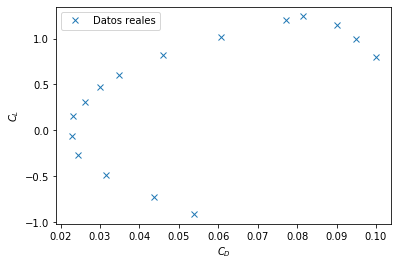

In [5]:
# Representamos los datos
plt.plot(C_D, C_L, 'x', mew=1, label="Datos reales")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend()

Vemos la forma clásica de la *polar de un avión*. Hallando el índice del máximo valor de $C_L$ podemos descartar los datos fuera de la región de entrada en pérdida, y para eso necesitamos la función `np.argmax`:

In [6]:
# Identificamos la región de la pérdida
idx_stall = np.argmax(C_L)
idx_stall

12

In [7]:
# Identificamos el CLMAX
C_L[idx_stall]

1.24

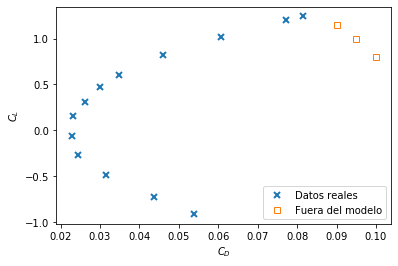

In [8]:
# Representamos los datos dentro y fuera del modelo
plt.plot(C_D[:idx_stall + 1], C_L[:idx_stall + 1], 'x', mew=2, label="Datos reales")
plt.plot(C_D[idx_stall + 1:], C_L[idx_stall + 1:], 's', mfc='none', label="Fuera del modelo")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend(loc=4)

Hay dos aspectos que nos pueden interesar:

* Puesto que *solo tenemos puntos intermedios*, no tenemos posibilidad de evaluar, por ejemplo, $C_L$ para un dado $C_D$ que no se encuentre en los datos. Si **interpolamos** la curva ya podemos hacerlo.
* Sabemos que, fuera de la región de entrada en pérdida, la polar tiene *forma parabólica*. Si **ajustamos** la curva podemos obtener la expresión analítica de la polar.

## Interpolación

Para interpolar utilizaremos el paquete `interpolate` de SciPy:

In [9]:
from scipy import interpolate

Vamos a generar unos puntos de ejemplo para explicar cómo funciona. Para eso, vamos a usar simplemente la función $\sin{x}$ en un dominio con pocos puntos:

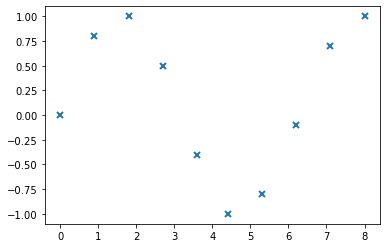

In [10]:
x_i = [0.0, 0.9, 1.8, 2.7, 3.6, 4.4, 5.3, 6.2, 7.1, 8.0]
y_i = [0.0, 0.8, 1.0, 0.5, -0.4, -1.0, -0.8, -0.1, 0.7, 1.0]
plt.plot(x_i, y_i, 'x', mew=2)

Para crear una **función interpolante** utilizaremos el objeto `InterpolatedUnivariateSpline` del paquete `interpolate`. A este objeto solo hay que pasarle los puntos de interpolación y el grado, y generará un *spline*.

In [15]:
f_interp = interpolate.InterpolatedUnivariateSpline(x_i, y_i, k=2)
f_interp

¿Cómo obtengo los puntos desde aquí? El resultado que hemos obtenido es una *función* la cual admite como argumento la $x$.

In [16]:
f_interp(np.pi / 2)

array(1.01557478)

Vamos a representar esta función junto con los puntos de interpolación. Notemos que, ahora que disponemos de una función interpolante, podemos representarla en un dominio:

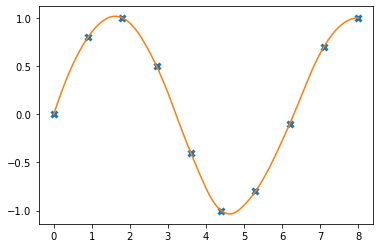

In [17]:
x = np.linspace(0, 8, 1000)
y_interp = f_interp(x)

plt.plot(x_i, y_i, 'x', mew=3)
plt.plot(x, y_interp)

Procuremos ahora retroceder y comprobar el resultado que se obtiene al cambiar el grado del *spline*.

**Ejercicio**: Crear una función interpolante $C_D = f(C_L)$ usando splines de grado 2 y representarla. Utilizar solo los datos que resultan de haber eliminado la región de entrada en pérdida.

**Solucion**:
1. Crear un polinomio interpolante usando los valores que encajan en el modelo parabólico.
2. Crear un dominio de $C_L$ entre `C_L.min()` y `C_L.max()`.
3. Hallar los valores interpolados de $C_D$ en ese dominio.
4. Representar la función y los puntos.

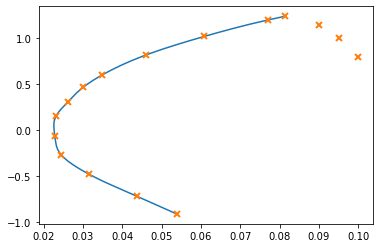

In [17]:
f_C_D = interpolate.InterpolatedUnivariateSpline(C_L[:idx_stall + 1], C_D[:idx_stall + 1], k=2)

C_L_domain = np.linspace(C_L.min(), C_L.max())
C_D_interp = f_C_D(C_L_domain)

plt.plot(C_D_interp, C_L_domain)
plt.plot(C_D, C_L, 'x', mew=2)

### Fenómeno de Runge 

In [19]:
def runge(x):
    return 1 / (1 + x ** 2)

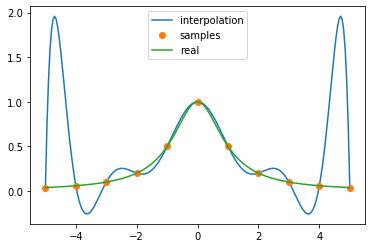

In [20]:
# Número de nodos
N = 11  # Nodos de interpolación

# Seleccionamos los nodos
xp = np.linspace(-5, 5, N)   # -5, -4, -3, ..., 3, 4, 5
fp = runge(xp)

# Seleccionamos los puntos para interpolar
x = np.linspace(-5, 5, 200)

# Calculamos el polinomio interpolador de Lagrange
lag_pol = interpolate.lagrange(xp, fp)

y = lag_pol(x)

# Graficamos
plt.plot(x, y, label='interpolation')
plt.plot(xp, fp, 'o', label='samples')
plt.plot(x, runge(x), label='real')
plt.legend(loc='upper center')

In [22]:
# Importamos el polinomio de Chebyshev
from numpy.polynomial import chebyshev

In [23]:
N = 11  # Nodos de interpolación

coeffs_cheb = [0] * N + [1]  # Solo queremos el elemento 11 de la serie

print(coeffs_cheb)


T11 = chebyshev.Chebyshev(coeffs_cheb, [-5, 5])
xp_ch = T11.roots()

xp_ch

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


array([-4.94910721e+00, -4.54815998e+00, -3.77874787e+00, -2.70320409e+00,
       -1.40866278e+00, -6.03038648e-16,  1.40866278e+00,  2.70320409e+00,
        3.77874787e+00,  4.54815998e+00,  4.94910721e+00])

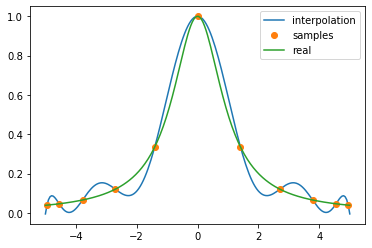

In [24]:
fp = runge(xp_ch)

x = np.linspace(-5, 5, 200)

lag_pol = interpolate.lagrange(xp_ch, fp)

y = lag_pol(x)

plt.plot(x, y, label='interpolation')
plt.plot(xp_ch, fp, 'o', label='samples')
plt.plot(x, runge(x), label='real')
plt.legend()

## Ajuste

El ajuste funciona de manera totalmente distinta: obtendremos una curva que no tiene por qué pasar por ninguno de los puntos originales, pero que a cambio tendrá una expresión analítica simple.

In [25]:
from scipy.optimize import curve_fit

Vamos otra vez a generar unos datos para ver cómo funcionaría, del tipo:

$$y(x) = x^2 - x + 1 + \text{Ruido}$$

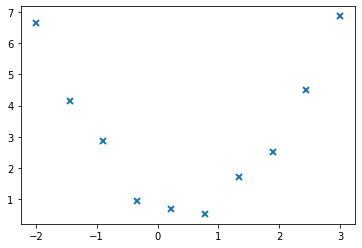

In [38]:
x_i = np.linspace(-2, 3, num=10)
y_i = x_i ** 2 - x_i + 1 + 0.5 * np.random.randn(10)
plt.plot(x_i, y_i, 'x', mew=2)

Vamos a utilizar la función `polynomial.polyfit`, que recibe los puntos de interpolación y el grado del polinomio. El resultado serán los coeficientes del mismo, **en orden de potencias crecientes**.

In [39]:
def poldeg2(x, a, b, c):
    return a * x**2 + b * x + c

In [42]:
val, cov = curve_fit(poldeg2, x_i, y_i)
a, b, c= val

print(a, b, c)
print(cov)

0.980983188380679 -0.9303502064410386 0.8613412910732015
[[ 0.00128646 -0.00128646 -0.00295408]
 [-0.00128646  0.0038276   0.00168351]
 [-0.00295408  0.00168351  0.01388925]]


Grafiquemos los datos y el ajuste obtenido:

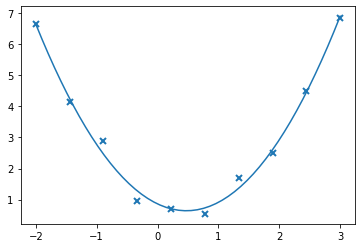

In [41]:
x = np.linspace(-2, 3)

y_fit = poldeg2(x, a, b, c)

l, = plt.plot(x, y_fit)
plt.plot(x_i, y_i, 'x', mew=2, c=l.get_color())

##### Ejercicio

Si modelizamos la *polar del avion* como:

$$C_D = C_{D0} + k C_L^2$$

hallar los coeficientes $C_{D0}$ y $k$.

In [47]:
def model(x, A, C):
    return A*x**2 + C

In [48]:
C_L
C_D

array([0.0538, 0.0438, 0.0316, 0.0245, 0.0228, 0.0232, 0.0262, 0.0301,
       0.0348, 0.0461, 0.0608, 0.0771, 0.0814, 0.09  , 0.095 , 0.1   ])

In [49]:
popt, _ = curve_fit(model, C_L[:idx_stall+1], C_D[:idx_stall+1])

In [50]:
A, B = popt

In [51]:
x = np.linspace(-1.5, 1.5, 50)
y = model(x, A, B)

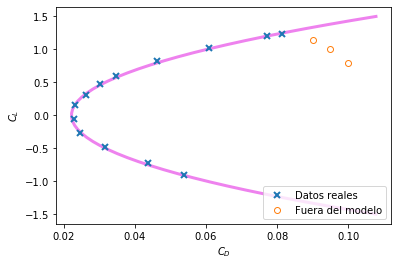

In [59]:
plt.plot(y, x, c='violet',linewidth=3)
plt.plot(C_D[:idx_stall + 1], C_L[:idx_stall + 1], 'x', mew=2, label="Datos reales")
plt.plot(C_D[idx_stall + 1:], C_L[idx_stall + 1:], 'o', mfc='none', label="Fuera del modelo")
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.legend(loc=4)

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())